In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read Dataset

In [3]:
data = pd.read_csv("cardekho.csv")
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


## Data Description

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [6]:
data.describe().round(2)

,year,selling_price,km_driven,mileage(km/ltr/kg),engine,seats
count,8128.00,8128.00,8128.00,7907.00,7907.00,7907.00
mean,2013.80,638271.81,69819.51,19.42,1458.63,5.42
std,4.04,806253.40,56550.55,4.04,503.92,0.96
min,1983.00,29999.00,1.00,0.00,624.00,2.00
25%,2011.00,254999.00,35000.00,16.78,1197.00,5.00
50%,2015.00,450000.00,60000.00,19.30,1248.00,5.00
75%,2017.00,675000.00,98000.00,22.32,1582.00,5.00
max,2020.00,10000000.00,2360457.00,42.00,3604.00,14.00


# Data Preprocessong

#### Convert **numeric Features** to **numeric datatype**

In [9]:
data['max_power'] = pd.to_numeric(data['max_power'], errors='coerce')

#### Remove **Unuseful Features**

In [11]:
data = data.drop(columns='seller_type')

In [12]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0


In [13]:
data.shape

(8128, 11)

### Check **Nulls** and remove them

In [15]:
data.isna().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             216
seats                 221
dtype: int64

In [16]:
data = data.dropna()

In [17]:
data.isna().sum()

name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
transmission          0
owner                 0
mileage(km/ltr/kg)    0
engine                0
max_power             0
seats                 0
dtype: int64

### Check **Duplicates** and remove them

In [19]:
data.duplicated().sum()

1189

In [20]:
data = data.drop_duplicates()

In [21]:
data.duplicated().sum()

0

### Check **Outliers** and remove them

In [23]:
print(data[['km_driven', 'selling_price']].describe().round(2))

        km_driven  selling_price
count     6717.00        6717.00
mean     73398.34      526386.00
std      58703.28      523550.45
min          1.00       29999.00
25%      38000.00      250000.00
50%      68203.00      420000.00
75%     100000.00      650000.00
max    2360457.00    10000000.00


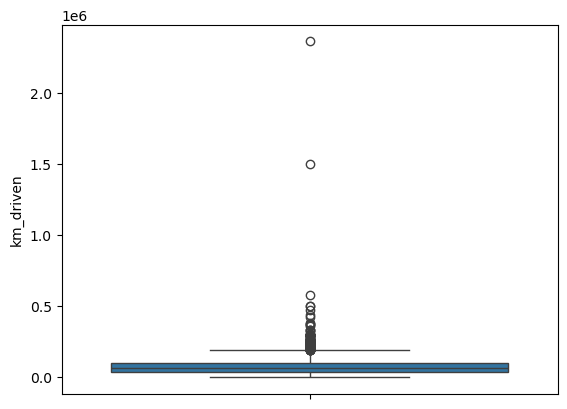

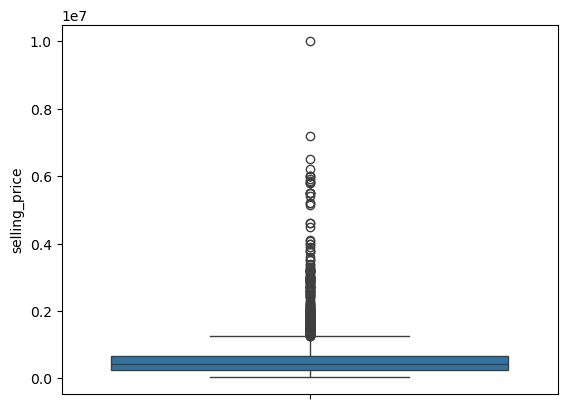

In [24]:
sns.boxplot(data['km_driven'])
plt.show()

sns.boxplot(data['selling_price'])
plt.show()

In [25]:
# Calculate Q1, Q3 and IQR
Q1 = data[['km_driven', 'selling_price']].quantile(0.25)
Q3 = data[['km_driven', 'selling_price']].quantile(0.75)
IQR = Q3 - Q1

In [26]:
# Filter out outliers based on IQR
data = data[~((data[['km_driven', 'selling_price']] < (Q1 - 1.5 * IQR)) | (data[['km_driven', 'selling_price']] > (Q3 + 1.5 * IQR))).any(axis=1)]

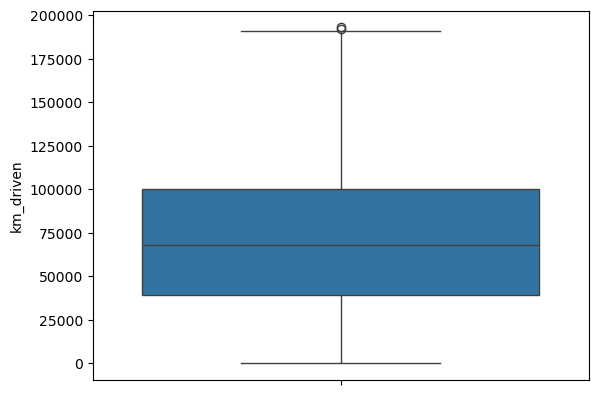

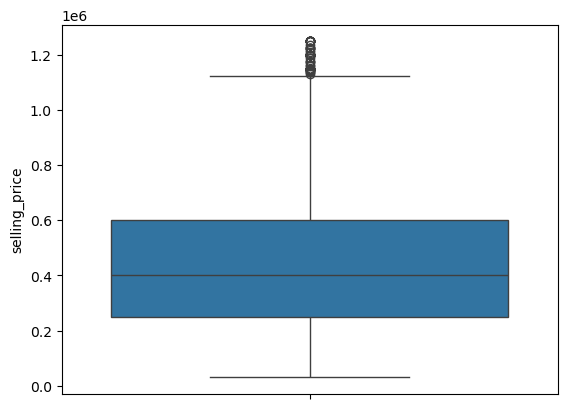

In [27]:
sns.boxplot(data['km_driven'])
plt.show()

sns.boxplot(data['selling_price'])
plt.show()

## Label Encoding.

In [29]:
data['owner'].value_counts()

owner
First Owner             3861
Second Owner            1773
Third Owner              471
Fourth & Above Owner     145
Name: count, dtype: int64

In [30]:
data['owner'] = data['owner'].map({"First Owner":1, "Second Owner":2, "Third Owner":3, "Fourth & Above Owner":4})

In [31]:
data['fuel'].value_counts()

fuel
Diesel    3250
Petrol    2916
CNG         50
LPG         34
Name: count, dtype: int64

In [32]:
data['fuel'] = data['fuel'].map({"Diesel":1, "Petrol":2, "CNG":3, "LPG":4})

# OR
# pd.get_dummies(data['fuel'], prefix='fuel')

In [33]:
data['transmission'].value_counts()

transmission
Manual       5874
Automatic     376
Name: count, dtype: int64

In [34]:
data['transmission'] = data['transmission'].map({"Manual":1, "Automatic":2})

In [35]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,3,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,16.10,1298.0,88.20,5.0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6250 entries, 0 to 8125
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6250 non-null   object 
 1   year                6250 non-null   int64  
 2   selling_price       6250 non-null   int64  
 3   km_driven           6250 non-null   int64  
 4   fuel                6250 non-null   int64  
 5   transmission        6250 non-null   int64  
 6   owner               6250 non-null   int64  
 7   mileage(km/ltr/kg)  6250 non-null   float64
 8   engine              6250 non-null   float64
 9   max_power           6250 non-null   float64
 10  seats               6250 non-null   float64
dtypes: float64(4), int64(6), object(1)
memory usage: 585.9+ KB


In [37]:
data.describe().round(2)

,year,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
count,6250.00,6250.00,6250.00,6250.00,6250.00,6250.00,6250.00,6250.00,6250.00,6250.00
mean,2013.55,444491.00,69705.26,1.50,1.06,1.50,19.76,1375.91,83.64,5.38
std,3.88,253225.24,39716.98,0.55,0.24,0.73,3.92,445.28,25.55,0.94
min,1994.00,29999.00,1.00,1.00,1.00,1.00,0.00,624.00,32.80,2.00
25%,2011.00,250000.00,39000.00,1.00,1.00,1.00,17.10,1196.00,67.10,5.00
50%,2014.00,400000.00,68171.50,1.00,1.00,1.00,19.70,1248.00,81.80,5.00
75%,2017.00,600000.00,100000.00,2.00,1.00,2.00,22.71,1497.00,97.70,5.00
max,2020.00,1250000.00,193000.00,4.00,2.00,4.00,33.44,3498.00,272.00,14.00


In [38]:
data

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,1,1,1,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,1,1,2,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,2,1,3,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,1,1,1,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,2,1,1,16.10,1298.0,88.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,2,1,2,18.90,998.0,67.10,5.0
8122,Hyundai i20 Magna 1.4 CRDi,2014,475000,80000,1,1,2,22.54,1396.0,88.73,5.0
8123,Hyundai i20 Magna,2013,320000,110000,2,1,1,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,1,1,4,16.80,1493.0,110.00,5.0


## Standardization

In [40]:
scale = data.loc[:, (data.columns != 'selling_price') & (data.columns != 'name')]

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
X_scale = scaler.fit_transform(scale)

In [44]:
colums = ['year', 'km_driven', 'fuel', 'transmission', 'owner', 
          'mileage(km/ltr/kg)', 'engine', 'max_power', 'seats']

In [45]:
X_scale = pd.DataFrame(X_scale, columns=colums, index=data.index)
X_scale

,year,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,0.115038,1.908524,-0.912900,-0.253004,-0.685918,0.928311,-0.287271,-0.377203,-0.405987
1,0.115038,1.266430,-0.912900,-0.253004,0.675031,0.351201,0.274215,0.778393,-0.405987
2,-1.944358,1.770033,0.916999,-0.253004,2.035979,-0.527232,0.271969,-0.220618,-0.405987
3,-0.914660,1.442691,-0.912900,-0.253004,-0.685918,0.826168,0.045129,0.249136,-0.405987
4,-1.686934,1.266430,0.916999,-0.253004,-0.685918,-0.935806,-0.174974,0.178673,-0.405987
...,...,...,...,...,...,...,...,...,...
8121,-0.142387,-0.496182,0.916999,-0.253004,0.675031,-0.220802,-0.848757,-0.647312,-0.405987
8122,0.115038,0.259223,-0.912900,-0.253004,0.675031,0.708703,0.045129,0.199421,-0.405987
8123,-0.142387,1.014628,0.916999,-0.253004,-0.685918,-0.322946,-0.401814,-0.030759,-0.405987
8124,-1.686934,1.241250,-0.912900,-0.253004,3.396928,-0.757055,0.262985,1.032061,-0.405987


In [46]:
data_scale = data.copy()
data_scale[colums] = X_scale

In [47]:
data_scale

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,0.115038,450000,1.908524,-0.912900,-0.253004,-0.685918,0.928311,-0.287271,-0.377203,-0.405987
1,Skoda Rapid 1.5 TDI Ambition,0.115038,370000,1.266430,-0.912900,-0.253004,0.675031,0.351201,0.274215,0.778393,-0.405987
2,Honda City 2017-2020 EXi,-1.944358,158000,1.770033,0.916999,-0.253004,2.035979,-0.527232,0.271969,-0.220618,-0.405987
3,Hyundai i20 Sportz Diesel,-0.914660,225000,1.442691,-0.912900,-0.253004,-0.685918,0.826168,0.045129,0.249136,-0.405987
4,Maruti Swift VXI BSIII,-1.686934,130000,1.266430,0.916999,-0.253004,-0.685918,-0.935806,-0.174974,0.178673,-0.405987
...,...,...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,-0.142387,260000,-0.496182,0.916999,-0.253004,0.675031,-0.220802,-0.848757,-0.647312,-0.405987
8122,Hyundai i20 Magna 1.4 CRDi,0.115038,475000,0.259223,-0.912900,-0.253004,0.675031,0.708703,0.045129,0.199421,-0.405987
8123,Hyundai i20 Magna,-0.142387,320000,1.014628,0.916999,-0.253004,-0.685918,-0.322946,-0.401814,-0.030759,-0.405987
8124,Hyundai Verna CRDi SX,-1.686934,135000,1.241250,-0.912900,-0.253004,3.396928,-0.757055,0.262985,1.032061,-0.405987


## Text Preprocessing

In [49]:
data[data['name'].str.contains('Honda', case=False, na=False)]['selling_price'].shape

(350,)

In [50]:
data[data['name'] == 'Honda City 2017-2020 EXi']['selling_price'].shape

(7,)

In [51]:
data[(data['name'] == 'Honda City 2017-2020 EXi') & (data['year'] == 2006)]['selling_price'].shape

(2,)

In [52]:
# data['brand'] = data['name'].str.split(' ').str[0]
# data['model'] = data['name'].str.split(' ').str[1]
# data = data.drop(columns='name')